# Exploration

This notebook attempts to reproduce the work from [the Medium post](https://towardsdatascience.com/how-i-used-machine-learning-to-automatically-hand-draw-any-picture-7d024d0de997): **How I Used Machine Learning to Automatically Hand-Draw Any Picture**

## Imports

**Dependencies**

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

**Image to experiment with**

In [7]:
img_lion = cv2.imread("data/pain.jpg")

In [5]:
img_lion = cv2.resize(img_lion,(448,448),interpolation=cv2.INTER_AREA)

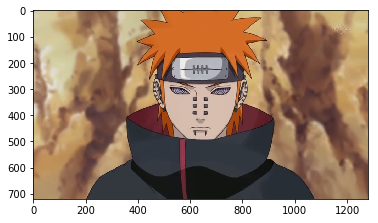

In [8]:
plt.imshow(cv2.cvtColor(img_lion,cv2.COLOR_BGR2RGB))

## 1. Processing the image

We need to extract the edges from out image. That way, the agent knows what lines to sketch. The general idea is,
1. Using OpenCV, we apply a Gaussian filter and use Canny Edge Detection to extract a large majority of the relevent lines to be drawn
2. Then, after using inverse binary thresholding to make our edges black, we can extract the desired outline for our program to draw

In [62]:
# Convert the image from Blue-Green-Red (BGR) to Gray-scale
img_lion_gray = cv2.cvtColor(img_lion,cv2.COLOR_BGR2GRAY)

In [63]:
# Gaussian blur kernel sizes
gaussian_blur_kernel_sizes = [0,3,9,21]

# Apply different gaussian blur kernel sizes to the image
img_lion_gray_gaussian_blurred = [cv2.GaussianBlur(img_lion_gray,(x,x),0) if x!= 0 else img_lion_gray for x in gaussian_blur_kernel_sizes]

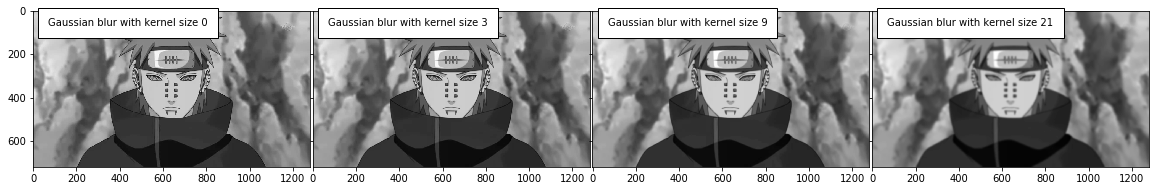

In [64]:
# Plot for comparison: Gaussian Blurring
fig1, axes1 = plt.subplots(1,4,sharex='col',sharey='row',
                           gridspec_kw={'hspace': 0,'wspace': .01},
                           figsize=(20,10))

for i,(ax1_x,img_lion_gray_gaussian_blurred_x) in enumerate(zip(axes1,img_lion_gray_gaussian_blurred)):
    ax1_x.imshow(img_lion_gray_gaussian_blurred_x,cmap="gray")
    ax1_x.text(70,70, f'Gaussian blur with kernel size {gaussian_blur_kernel_sizes[i]}', bbox={'facecolor': 'white', 'pad': 10})

In [65]:
# Canny line detection lower threshold; upper threshold is taken to be 3 * lower_threshold
canny_lower_thresholds = [1,25,50,75]

# Apply canny line detection to the blurred images
img_lion_gray_canny = [[cv2.Canny(img,thresh,3*thresh) for thresh in canny_lower_thresholds] for img in img_lion_gray_gaussian_blurred]

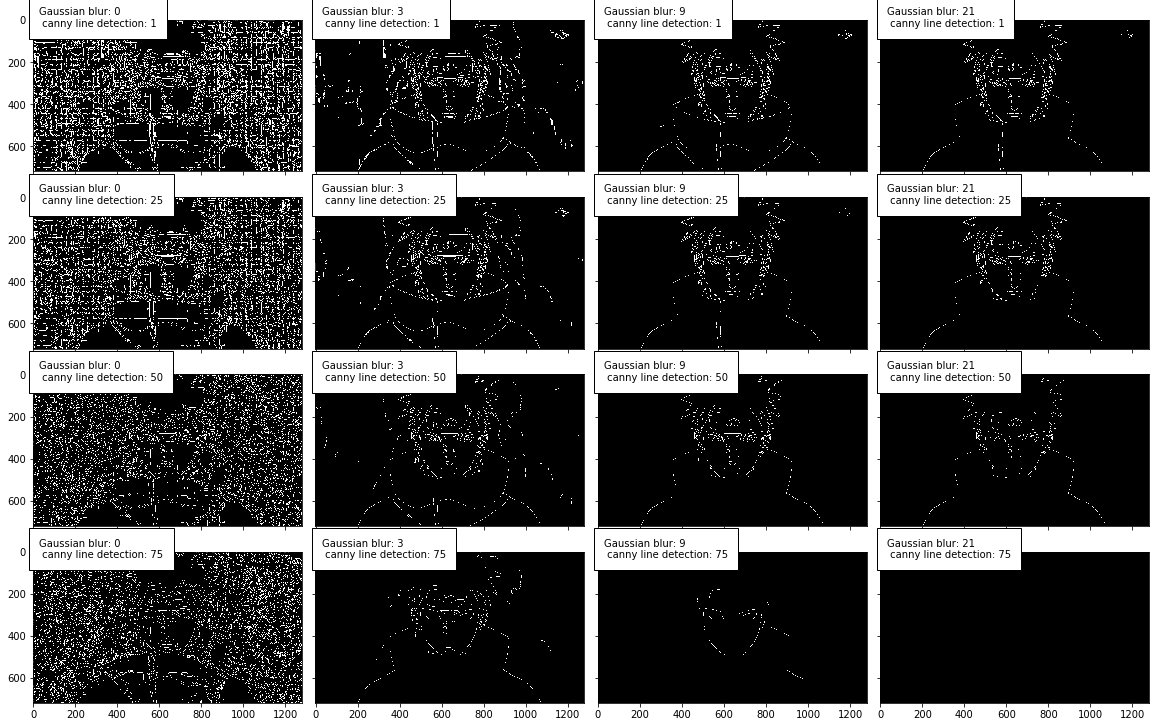

In [66]:
# Plot for comparison: Canny Line Detection
fig2, axes2 = plt.subplots(4,4,sharex='col',sharey='row',
                           gridspec_kw={'hspace': 0.01,'wspace': 0.05},
                           figsize=(20,13))

for i,img_thresholds in enumerate(img_lion_gray_canny):
    for j,img_threshold in enumerate(img_thresholds):
        plt.imshow(img_threshold)
        axes2[i][j].imshow(img_threshold,cmap="gray")
        axes2[i][j].text(30,30, f'Gaussian blur: {gaussian_blur_kernel_sizes[j]}\n canny line detection: {canny_lower_thresholds[i]}', bbox={'facecolor': 'white', 'pad': 10})

In [67]:
# Apply binary inverse thresholding to images
img_lion_thresholds = [[cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)[1] for img in imgs] for imgs in img_lion_gray_canny]

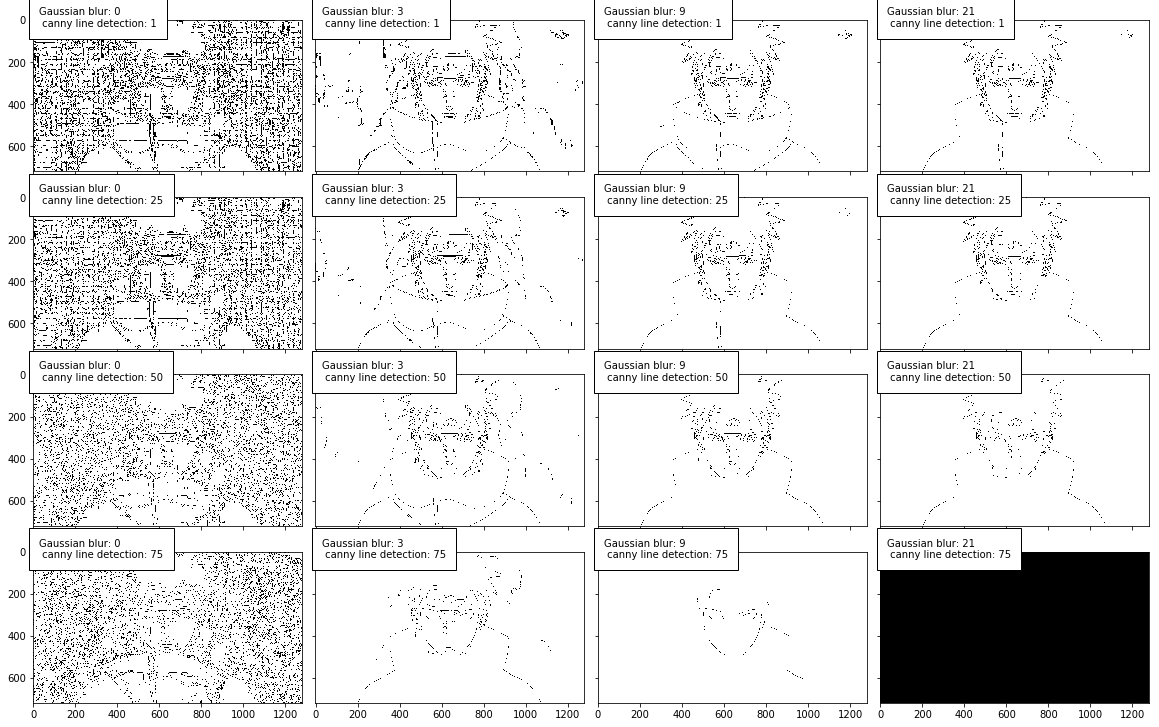

In [68]:
# Plot for comparison: Thresholding
fig4, axes4 = plt.subplots(4,4,sharex='col',sharey='row',
                           gridspec_kw={'hspace': 0.01,'wspace': 0.05},
                           figsize=(20,13))

for i,img_thresholds in enumerate(img_lion_thresholds):
    for j,img_threshold in enumerate(img_thresholds):
        axes4[i][j].imshow(img_threshold,cmap="gray")
        axes4[i][j].text(30,30, f'Gaussian blur: {gaussian_blur_kernel_sizes[j]}\n canny line detection: {canny_lower_thresholds[i]}', bbox={'facecolor': 'white', 'pad': 10})